In [ ]:
#Importing the basic pre-processing, exploratory data analysis and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Please note, I am working on Google Colab and the file address would differ from system to system
data_doc_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/doc_reports.csv")
data_facial_similarity_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/facial_similarity_reports.csv")

In [ ]:
data_doc_reports.head()
# Just exploring the data

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [ ]:
data_facial_similarity_reports.head()
#To explore the data

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [ ]:
'''
Trying to find if the number of entries are the same
'''

print("Length of the doc report is "+ str(len(data_doc_reports)))
print("Length of the facial similarity report is "+ str(len(data_facial_similarity_reports)))

Length of the doc report is 176404
Length of the facial similarity report is 176404


In [ ]:
docs_user_unique=data_doc_reports['user_id'].unique()
print(len(docs_user_unique))

facial_user_unique=data_facial_similarity_reports['user_id'].unique()
print(len(facial_user_unique))

#This indicates that out of the total 176404 reports, only 142724 are of unique users.

142724
142724


In [ ]:
'''
Trying to find if the number of atributes are the same.
'''

print("Number of columns in doc report is "+ str(data_doc_reports.shape[1]))
print("Number of columns in facial similarity report is "+ str(data_facial_similarity_reports.shape[1]))


Number of columns in doc report is 19
Number of columns in facial similarity report is 9


From the above output, it is clear that the two datasets have the same number of entries but different number of attributes. The next task would be to identify potential keys (in case there are any) that may be useful to interpret both datasets in conjunction.

In [ ]:
'''
We will first check with the user_id column because as per the API, they must be unique.
If they are unique and have the same number of unique records, then it can act as a key 
that links both data-sets. The pre-built equals function in the pandas library of Python just does that.
'''
print(data_doc_reports['user_id'].equals(data_facial_similarity_reports['user_id']))

True


From the above output, we can say that the user_id column can be used to understand the two datasets in conjunction. 

In [ ]:
'''
Now we will find the number of clear cases and the number of consider cases in  the two datasets.
This is just for analytics purposes.
'''
df_1_clear= data_doc_reports[data_doc_reports['result']=="clear"]
df_1_consider= data_doc_reports[data_doc_reports['result']=="consider"]
print("The number of clear cases in documents report is "+str(len(df_1_clear)))
print("The number of consider cases in documents report is "+str(len(df_1_consider)))

df_2_clear=data_facial_similarity_reports[data_facial_similarity_reports['result']=="clear"]
df_2_consider= data_facial_similarity_reports[data_facial_similarity_reports['result']=="consider"]
print("The number of clear cases in facial similarity report is "+ str(len(df_2_clear)))
print("The number of consider cases in facial similarity report is "+str(len(df_2_consider)))

The number of clear cases in documents report is 132402
The number of consider cases in documents report is 44002
The number of clear cases in facial similarity report is 165486
The number of consider cases in facial similarity report is 10917


In [ ]:
'''
Another important preprocessing task would be to ensure that the created_at field holds a valid date-time object of python.
This is to ensure we can perform date-time operations on them and also do time series graphs if required.
'''
data_doc_reports['created_at']=pd.to_datetime(data_doc_reports['created_at'])
data_facial_similarity_reports['created_at']=pd.to_datetime(data_facial_similarity_reports['created_at'])

print(data_doc_reports.dtypes) # Just to double check if the dtype is date-time type
print(data_facial_similarity_reports.dtypes)

Unnamed: 0                                          int64
user_id                                            object
result                                             object
visual_authenticity_result                         object
image_integrity_result                             object
face_detection_result                              object
image_quality_result                               object
created_at                            datetime64[ns, UTC]
supported_document_result                          object
conclusive_document_quality_result                 object
colour_picture_result                              object
data_validation_result                             object
data_consistency_result                            object
data_comparison_result                             object
attempt_id                                         object
police_record_result                               object
compromised_document_result                        object
properties    

Since we have figured out that the user_id is unique, and dealing with two datasets is cumbersome, it would be prudent to merge the two of them into a single one while ensuring that the duplicated columns are taken care of. We will name this newly created dataframe as final_data

In [ ]:

final_data=data_doc_reports.merge(data_facial_similarity_reports,on=data_doc_reports.index)
final_data.head()

,key_0,Unnamed: 0_x,user_id_x,result_x,visual_authenticity_result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_x,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_x,police_record_result,compromised_document_result,properties_x,sub_result,Unnamed: 0_y,user_id_y,result_y,face_comparison_result,created_at_y,facial_image_integrity_result,visual_authenticity_result_y,properties_y,attempt_id_y
0,0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


Now as we can see, there are some duplicate columns which have the suffix _x and _y. These need to be eliminated to make our dataset look cleaner and more memory and execution efficient

In [ ]:
final_data.columns

Index(['key_0', 'Unnamed: 0_x', 'user_id_x', 'result_x',
       'visual_authenticity_result_x', 'image_integrity_result',
       'face_detection_result', 'image_quality_result', 'created_at_x',
       'supported_document_result', 'conclusive_document_quality_result',
       'colour_picture_result', 'data_validation_result',
       'data_consistency_result', 'data_comparison_result', 'attempt_id_x',
       'police_record_result', 'compromised_document_result', 'properties_x',
       'sub_result', 'Unnamed: 0_y', 'user_id_y', 'result_y',
       'face_comparison_result', 'created_at_y',
       'facial_image_integrity_result', 'visual_authenticity_result_y',
       'properties_y', 'attempt_id_y'],
      dtype='object')

In [ ]:
'''
We need to drop key_0 which is an unwanted column (repetition of the index columns of both tables) in addition to taking care of 
the other duplicate columns having suffix of _x or _y
'''
final_data.drop(['key_0'],1,inplace=True)
dup_cols=[]
for i in final_data.columns:
  if "_y" in i or "_x" in i:
    org_name=i[:-2]
    dup_cols+=[org_name]

print(dup_cols)
print(len(dup_cols))

['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result', 'created_at', 'attempt_id', 'properties', 'Unnamed: 0', 'user_id', 'result', 'created_at', 'visual_authenticity_result', 'properties', 'attempt_id']
14


In [ ]:
'''
As we can see, the list dup_cols has two sets of the same name appearing
This was a part of the sanity check to confirm that there are two sets of each column.
To have only one set of unique names, we can create a new list
'''

new_dup_list=[]
for item in dup_cols:
  if item in new_dup_list:
    continue
  else:
    new_dup_list+=[item]

dup_cols=new_dup_list
print(dup_cols)
print(len(dup_cols)) #Just for sanity check that the number is halved

['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result', 'created_at', 'attempt_id', 'properties']
7


In [ ]:
'''
Now we will remove the duplicate columns.
However, result_x and result_y should not be removed because they won't be equal in values.
That is because a clear in documents doesnt necessarily translate to a clear in facial similarity 
'''
#First we will compare if the two columns indeed have the same values at each index
def is_equal_col(colA,colB,dataset):
  if dataset[colA].equals(dataset[colB]):
    return True
  return False

for i in dup_cols:
  if is_equal_col(i+'_y',i+'_x',final_data):
    final_data[i]=final_data[i+'_x']
    final_data.drop([i+'_x'],axis=1,inplace=True)
    final_data.drop([i+'_y'],axis=1,inplace=True)
    
final_data

,result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_x,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_x,police_record_result,compromised_document_result,properties_x,sub_result,result_y,face_comparison_result,created_at_y,facial_image_integrity_result,properties_y,attempt_id_y,Unnamed: 0,user_id,visual_authenticity_result
0,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,clear,clear,2017-06-20 23:12:58+00:00,clear,{},050a0596de424fab83c433eaa18b3f8d,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider
1,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 23:16:04+00:00,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,1,15a84e8951254011b47412fa4e8f65b8,clear
2,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,2017-06-20 17:59:49+00:00,clear,{},f9f84f3055714d8e8f7419dc984d1769,2,ffb82fda52b041e4b9af9cb4ef298c85,clear
3,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,2017-06-20 17:59:39+00:00,clear,{},10a54a1ecf794404be959e030f11fef6,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear
4,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-20 18:08:09+00:00,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,clear,clear,clear,clear,2017-06-20 22:25:53+00:00,clear,NaN,NaN,clear,clear,NaN,72a2cccc9e9942deb5274a16536bf2d0,clear,NaN,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,clear,clear,2017-06-20 22:25:53+00:00,clear,{},72a2cccc9e9942deb5274a16536bf2d0,181987,c7f99ee763bf45d289019c6ac2cbd919,clear
176400,clear,clear,clear,clear,2017-06-20 22:27:40+00:00,clear,NaN,NaN,clear,NaN,NaN,8c83017191204a3887c2d47ca2d998ce,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 22:27:40+00:00,clear,{},8c83017191204a3887c2d47ca2d998ce,181988,8b47d72c363e4591861f523dd7487f20,clear
176401,clear,clear,clear,clear,2017-06-20 22:25:59+00:00,clear,NaN,NaN,clear,clear,NaN,bfea35bcb6a940118ca5816cd8ffcae7,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,clear,clear,2017-06-20 22:25:59+00:00,clear,{},bfea35bcb6a940118ca5816cd8ffcae7,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear
176402,clear,clear,clear,clear,2017-06-20 22:35:40+00:00,clear,NaN,NaN,clear,clear,NaN,9190cf28b35b425083bdb41e121822fe,clear,NaN,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear,clear,clear,2017-06-20 22:35:41+00:00,clear,{},9190cf28b35b425083bdb41e121822fe,181990,65c49a09d299486091b6586487679b87,clear


In [ ]:
for i in final_data.columns:
  if '_x' in i:
    new_name=i[:-2]+'_docs'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)
  elif '_y' in i:
    new_name=i[:-2]+'_facial'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)
 

In [ ]:

final_data.rename({'Unnamed: 0': 'S.No.'},axis=1,inplace=True)
final_data.set_index(['S.No.'],inplace=True)
final_data

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial
S.No.,,,,,,,,,,,,,,,,,,,,,,,,
0,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,caution,clear,clear,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,2017-06-20 23:12:57+00:00,050a0596de424fab83c433eaa18b3f8d,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",clear,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d
1,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,f69c1e5f45a64e50a26740b9bfb978b7,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7
2,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,f9f84f3055714d8e8f7419dc984d1769,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769
3,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:38+00:00,10a54a1ecf794404be959e030f11fef6,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6
4,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,1f320d1d07de493292b7e0d5ebfb1cb9,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181987,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20 22:25:53+00:00,72a2cccc9e9942deb5274a16536bf2d0,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,2017-06-20 22:25:53+00:00,{},72a2cccc9e9942deb5274a16536bf2d0
181988,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20 22:27:40+00:00,8c83017191204a3887c2d47ca2d998ce,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 22:27:40+00:00,{},8c83017191204a3887c2d47ca2d998ce
181989,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20 22:25:59+00:00,bfea35bcb6a940118ca5816cd8ffcae7,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 22:25:59+00:00,{},bfea35bcb6a940118ca5816cd8ffcae7


Now we will do some analysis on the merged dataset to understand the data

In [ ]:
'''
First we will try and observe if the created_at_docs and created_at_facial columns have equal values
to understand the data further
'''

print(final_data['created_at_docs'].equals(final_data['created_at_facial']))



False


In [ ]:
'''
Given that the last output is False, let us investigate further to see how the difference of the two creation times are distributed
'''
import datetime

time_diff=final_data['created_at_docs']-final_data['created_at_facial']
time_diff

S.No.
0        -1 days +23:59:59
1          0 days 00:00:00
2          0 days 00:00:00
3        -1 days +23:59:59
4          0 days 00:00:00
                ...       
181987     0 days 00:00:00
181988     0 days 00:00:00
181989     0 days 00:00:00
181990   -1 days +23:59:59
181991     0 days 00:00:00
Length: 176404, dtype: timedelta64[ns]

In [ ]:
#We can see that most of the data seems to be differing in the magnitude of seconds. So, let us convert the difference into seconds

time_diff=pd.Series([time.total_seconds() for time in time_diff])
time_diff.value_counts()

 0.0    167121
-1.0      5775
 1.0      3507
 4.0         1
dtype: int64

From the result above, it can be seen that the difference in creation times is usually 0 seconds, and almost every time lies in the one second difference interval. There seems to be one outlier of 4 seconds.

In [ ]:
#As per the description, an attempt would be successful if it passes the facial similarity test and the document verification step
#So let us create a new column indicating pass so that we can later use it to figure out some correlations with other variables in the future



final_data['Passed?']=(final_data['result_docs']=="clear") & (final_data['result_facial']=="clear")
final_data

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial,Passed?
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,
0,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,caution,clear,clear,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,2017-06-20 23:12:57+00:00,050a0596de424fab83c433eaa18b3f8d,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",clear,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d,False
1,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,f69c1e5f45a64e50a26740b9bfb978b7,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7,True
2,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,f9f84f3055714d8e8f7419dc984d1769,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769,True
3,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:38+00:00,10a54a1ecf794404be959e030f11fef6,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6,True
4,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,1f320d1d07de493292b7e0d5ebfb1cb9,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181987,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20 22:25:53+00:00,72a2cccc9e9942deb5274a16536bf2d0,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,2017-06-20 22:25:53+00:00,{},72a2cccc9e9942deb5274a16536bf2d0,True
181988,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20 22:27:40+00:00,8c83017191204a3887c2d47ca2d998ce,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 22:27:40+00:00,{},8c83017191204a3887c2d47ca2d998ce,True
181989,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20 22:25:59+00:00,bfea35bcb6a940118ca5816cd8ffcae7,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 22:25:59+00:00,{},bfea35bcb6a940118ca5816cd8ffcae7,True


In [ ]:
'''
From the above table, let us check if there are columns that contain only NaN as the value
Specifically, we will be checking for these columns:
1.conclusive_document_quality_result
2.colour_picture_result
3.data_comparison_result
4.compromised_document_result

If the number of nans are equal to 176404 then that means all entries are nan for that particular column
'''
num_nan_conclu_doc_qu_res=final_data['conclusive_document_quality_result'].isnull().sum()
num_nan_col_pic_res=final_data['colour_picture_result'].isnull().sum()
num_nan_dat_com_res=final_data['data_comparison_result'].isnull().sum()
num_nan_comp_doc_res=final_data['compromised_document_result'].isnull().sum()
print("The number of null in conclusive_document_quality_result is "+str(num_nan_conclu_doc_qu_res))
print("The number of null in colour_picture_result is "+str(num_nan_col_pic_res))
print("The number of null in data_comparison_result is "+str(num_nan_dat_com_res))
print("The number of null in compromised_document_result is "+str(num_nan_comp_doc_res))




The number of null in conclusive_document_quality_result is 81187
The number of null in colour_picture_result is 81182
The number of null in data_comparison_result is 173856
The number of null in compromised_document_result is 130898


In [ ]:
#From the above output, it is clear that none of the columns are entirely NaN. So, they should not be dropped for the complete analysis.
#It is possible they aid in the future data analysis for some other cases.

'''
Now we will have some users trying multiple attempts.The final pass or fail is considered to be the best of two attempts.
This means that we will have user_id values that will be repeated.
First let us try and find the distribution of the number of attempts
'''
#At the beginning let us find the number of users who have just one attempt 

single_attemptors=final_data.drop_duplicates('user_id',False)
len(single_attemptors)

110374

In [ ]:
#Let's find the number of attempts by users 
num_attempts_per_user=final_data['user_id'].value_counts()
num_attempts_per_user

2df96cd3537d415a9e7f23f419197187    6
6eeb7dbdf1fa4e7c95413bc0608dd21c    6
0749e4cc340c45f3aae46080318fcc0b    5
37942d5cef7f428381ba2d56eb9c0da6    5
d3aa9ff3437a4ade990805eeb01bba2b    5
                                   ..
751ddac3178d42d285afa39e5f394adf    1
18015fe6de614dec9709a730373426bf    1
2b22c45c752d4a6497ea88f491b6fd14    1
1e536688611f492183b364474fac6eba    1
b5a9ed6f576c4fe6818c396ef1404db0    1
Name: user_id, Length: 142724, dtype: int64

In [ ]:
'''
Unexpectedly there are users who have attempted more than once.
Based on the problem statement, the max number of attempts is 2.
This fact has to be taken care of while dealing with the data
'''
#Let's find the distribution of the number of attempts

single_attempts=num_attempts_per_user[num_attempts_per_user==1].count()  #Must be 110374 for sanity purposes
double_attempts=num_attempts_per_user[num_attempts_per_user==2].count()
triple_attempts=num_attempts_per_user[num_attempts_per_user==3].count()
quadrupule_attempts=num_attempts_per_user[num_attempts_per_user==4].count()
more_than_four_attempts=num_attempts_per_user[num_attempts_per_user>4].count()

print("Single attemptors are "+str(single_attempts)+" in number.")
print("Double attemptors are "+str(double_attempts)+" in number.")
print("Triple attemptors are "+str(triple_attempts)+" in number.")
print("Quadruple attemptors are "+str(quadrupule_attempts)+" in number.")
print("More than 4 attemptors are "+str(more_than_four_attempts)+" in number.")

Single attemptors are 110374 in number.
Double attemptors are 31118 in number.
Triple attemptors are 1145 in number.
Quadruple attemptors are 78 in number.
More than 4 attemptors are 9 in number.


In [ ]:
'''
Let us explore the data further and try to find anomalies if there are any
'''
#Question: Are there users who passed their first attempt but still went on to do more attempts?
mult_attempts=final_data[final_data.duplicated('user_id',keep=False)] #Extracting all duplicates present in the dataset
#print(mult_attempts)
#Now we will keep only the first occurence of the multiple attempts user_id
mult_att_first_occ=mult_attempts.drop_duplicates('user_id',keep='first')
#print(mult_att_first_occ)
anomaly_passed_first_attempt=mult_att_first_occ[mult_att_first_occ['Passed?']==True]
print("The number of such anomalous cases are "+ str(len(anomaly_passed_first_attempt)))


The number of such anomalous cases are 8947


In [ ]:
'''
To find the exact pass rate, we will find the total number of people who passed in the first attempt 
and those who passed in the second attempt.
'''
first_attempts_list= final_data.drop_duplicates('user_id',keep='first') #Number of unique users
#len(first_attempts_list)
first_attempt_failed=final_data[final_data['Passed?']==False]
#len(first_attempt_failed)

second_attempts_list=mult_attempts.groupby(['user_id']).head(2).groupby(['user_id']).tail(1) #Dataframe containing those entries which have more than one attempt, but only their last attempt details
second_attempts_list

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial,Passed?
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,
18,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,b20147d91fdf4ac289ddd80c4be9716a,clear,clear,2017-06-20 19:00:27+00:00,aa906e5f7be04ebca1d79091f5294f58,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 19:00:27+00:00,{},aa906e5f7be04ebca1d79091f5294f58,True
33,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,80335b5bfe4241b9906b52ca4bac0dc2,clear,clear,2017-06-20 15:01:35+00:00,155bb52483974dc2a8f7beedfc740ec1,"{'gender': 'Male', 'nationality': 'ESP', 'docu...",clear,2017-06-20 15:01:35+00:00,{},155bb52483974dc2a8f7beedfc740ec1,True
57,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,a14da2bdb1c44b5d95b459f2a0be7322,clear,clear,2017-06-20 17:48:16+00:00,afc63dfbaba440b1b13f8163328228fc,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,2017-06-20 17:48:16+00:00,{},afc63dfbaba440b1b13f8163328228fc,True
78,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,5c760e769ebf487ba82f3548fe006f4d,clear,clear,2017-06-20 13:31:38+00:00,faf23129cca3445ab3006f4df624f52d,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 13:31:38+00:00,{},faf23129cca3445ab3006f4df624f52d,True
81,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,df16b565b6b644a3aa4ea3bdd34f3663,clear,clear,2017-06-20 13:50:36+00:00,6e8fbfe6beac4ac2861e90587d1fb918,"{'gender': 'Male', 'nationality': 'GBR', 'docu...",clear,2017-06-20 13:50:36+00:00,{},6e8fbfe6beac4ac2861e90587d1fb918,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181946,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,c7fa135ac45a4f7e98acae02bdee568c,clear,clear,2017-06-21 13:13:28+00:00,8cddf13206c445f8af3c88ffdfe2efa5,"{'gender': 'Male', 'issuing_date': '2015-06', ...",clear,2017-06-21 13:13:28+00:00,{},8cddf13206c445f8af3c88ffdfe2efa5,True
181963,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,consider,clear,7a636ac3c33a49ff846259560aaf7685,clear,clear,2017-06-21 13:52:44+00:00,b90f1e12c24f4d5c926df1546c61ffa8,"{'gender': 'Female', 'document_type': 'driving...",consider,2017-06-21 13:52:44+00:00,{},b90f1e12c24f4d5c926df1546c61ffa8,False
181978,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,a0d443689ede49ab8c29f00662621e55,clear,clear,2017-06-20 20:59:39+00:00,8e626ecf669b4ab8b0b86f95dfdf85a1,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 20:59:39+00:00,{},8e626ecf669b4ab8b0b86f95dfdf85a1,True


In [ ]:
temp1= pd.concat([first_attempt_failed,second_attempts_list])
temp1=temp1.drop_duplicates('user_id','last') # We are keeping only the last attempt of users who made multiple attempts and failed the first
temp2=pd.concat([first_attempts_list,temp1])
temp2=temp2.drop_duplicates('user_id','last')
#Basically the idea of temp2 is to create a dataframe that has the records which passed in the first attempt and also records that failed the first one
#This is to help calculate the pass rate effectively.
pass_rate= temp2.sort_values(['created_at_facial'])
pass_rate.reset_index(drop=True, inplace=True)

In [ ]:
#Finding the max and min dates to plot the data
max_date=max(final_data['created_at_docs'])
min_date=min(final_data['created_at_docs'])



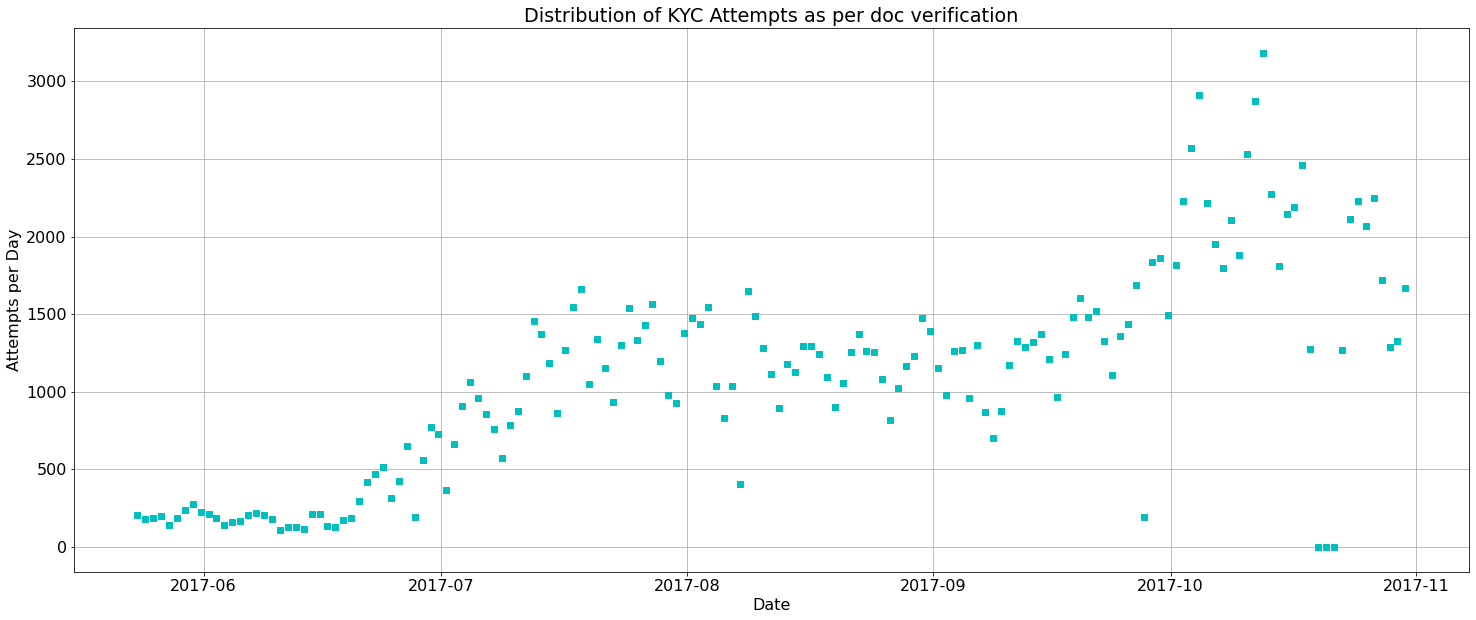

In [ ]:
time_range=pd.date_range(min_date,max_date)
bins=[]
#Now we want bins to cover the datapoints between two consecutive days

for item in range(len(time_range)-1):
  higher=final_data['created_at_docs']<time_range[item+1]
  lower=final_data['created_at_docs']>time_range[item]
  bins.append(len(final_data[higher & lower]))

plt.rcParams['figure.figsize']=(25,10)
plt.rcParams.update({'font.size':16})

plt.grid(True)
plt.plot(time_range[:-1],bins,'cs')
plt.ylabel("Attempts per Day", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.title('Distribution of KYC Attempts as per doc verification')
plt.show()

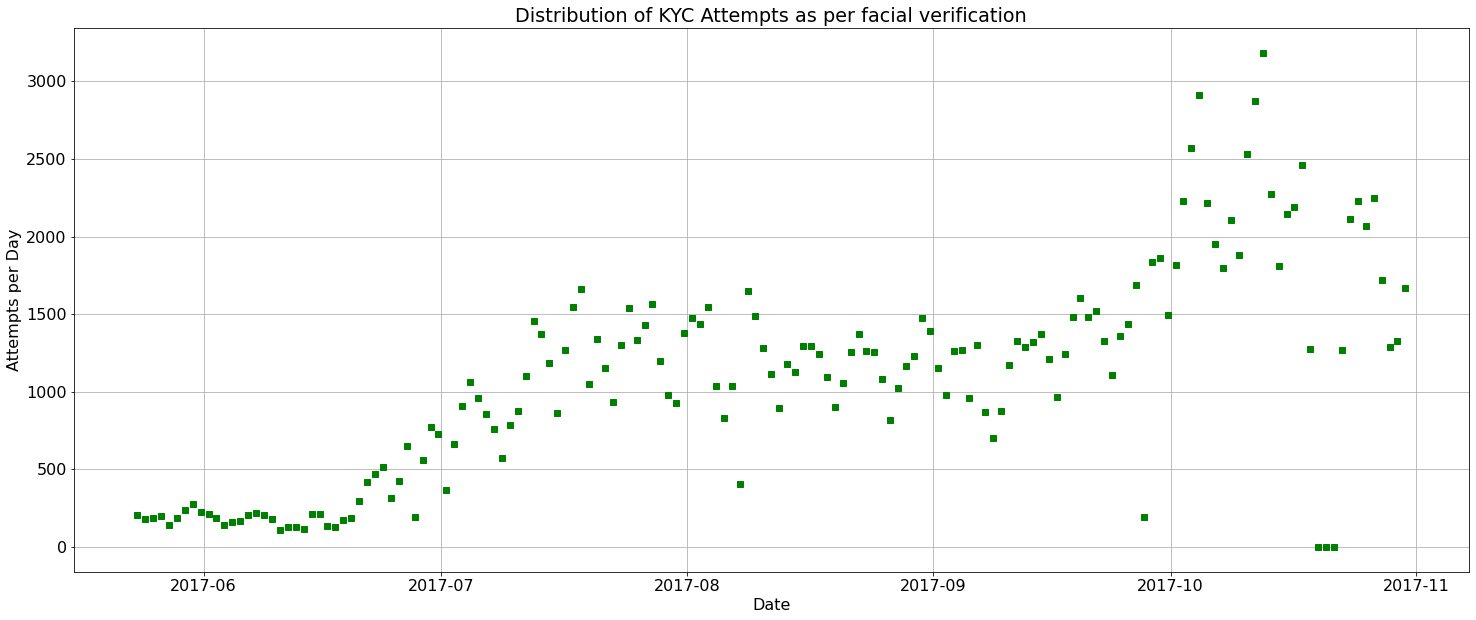

In [ ]:
#Just for sanity check purposes, they should give the same graph 
max_date=max(final_data['created_at_facial'])
min_date=min(final_data['created_at_facial'])

time_range=pd.date_range(min_date,max_date)
bins=[]
#Now we want bins to cover the datapoints between two consecutive days

for item in range(len(time_range)-1):
  higher=final_data['created_at_facial']<time_range[item+1]
  lower=final_data['created_at_facial']>time_range[item]
  bins.append(len(final_data[higher & lower]))

plt.rcParams['figure.figsize']=(25,10)
plt.rcParams.update({'font.size':16})

plt.grid(True)
plt.plot(time_range[:-1],bins,'gs')
plt.ylabel("Attempts per Day", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.title('Distribution of KYC Attempts as per facial verification')
plt.show()

In [ ]:
'''
Now let us analyse and visualise the absolute pass rate, the document pass rate, facial similarity pass rates
to find if there are any patterns or correlations.
For the pass rates, we have to average them over specific periods of time.
This can be done by simple moving average(SMA).
We will not use exponential moving average because we want to give equal weightage to the N recent observations.
There is no logical basis to give more weightage to more recent or older attempts because they may skew our results in unwanted ways
'''
def sma(x,N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)



In [ ]:
#This code doesnt work properly with newer versions of matplotlib. Please use older versions to run it.
'''
def plt_sma(vars,labs,title='',start=0,N=4500):
    time_list =  list(final_data["created_at_facial"])
    for i in range(len(vars)):
        time_list =  list(final_data["created_at_facial"])
        y = list(vars[i].astype(int))
        short_ma = sma(y,N)
        starting_ind = len(time_list) - len(short_ma)
        time_list = time_list[starting_ind:]
        label = labs[i]
        time_list = time_list[starting_ind:]
        short_ma = short_ma[starting_ind:]
        plt.plot(time_list,ma,label= label.format(i=i))
    plt.grid(b=True)
    plt.legend(loc='best',prop={'size': 30})
    plt.ylabel("Rate",fontsize=16)
    plt.xlabel("Time",fontsize=16)
    plt.title(title)
    plt.show()
    
    

facial_res= final_data["result_facial"] == "clear"

document_res = final_data["result_docs"] == "clear"

plt_sma([final_data['Passed?'],document_res,facial_res],['Overall Pass Rate','Document Check Pass Rate','Facial Similarity Check Pass Rate'],'KYC Pass Rate')

'''


'\ndef plt_sma(vars,labs,title=\'\',start=0,N=4500):\n    time_list =  list(final_data["created_at_facial"])\n    for i in range(len(vars)):\n        time_list =  list(final_data["created_at_facial"])\n        y = list(vars[i].astype(int))\n        short_ma = sma(y,N)\n        starting_ind = len(time_list) - len(short_ma)\n        time_list = time_list[starting_ind:]\n        label = labs[i]\n        time_list = time_list[starting_ind:]\n        short_ma = short_ma[starting_ind:]\n        plt.plot(time_list,ma,label= label.format(i=i))\n    plt.grid(b=True)\n    plt.legend(loc=\'best\',prop={\'size\': 30})\n    plt.ylabel("Rate",fontsize=16)\n    plt.xlabel("Time",fontsize=16)\n    plt.title(title)\n    plt.show()\n    \n    \n\nfacial_res= final_data["result_facial"] == "clear"\n\ndocument_res = final_data["result_docs"] == "clear"\n\nplt_sma([final_data[\'Passed?\'],document_res,facial_res],[\'Overall Pass Rate\',\'Document Check Pass Rate\',\'Facial Similarity Check Pass Rate\'],\'K

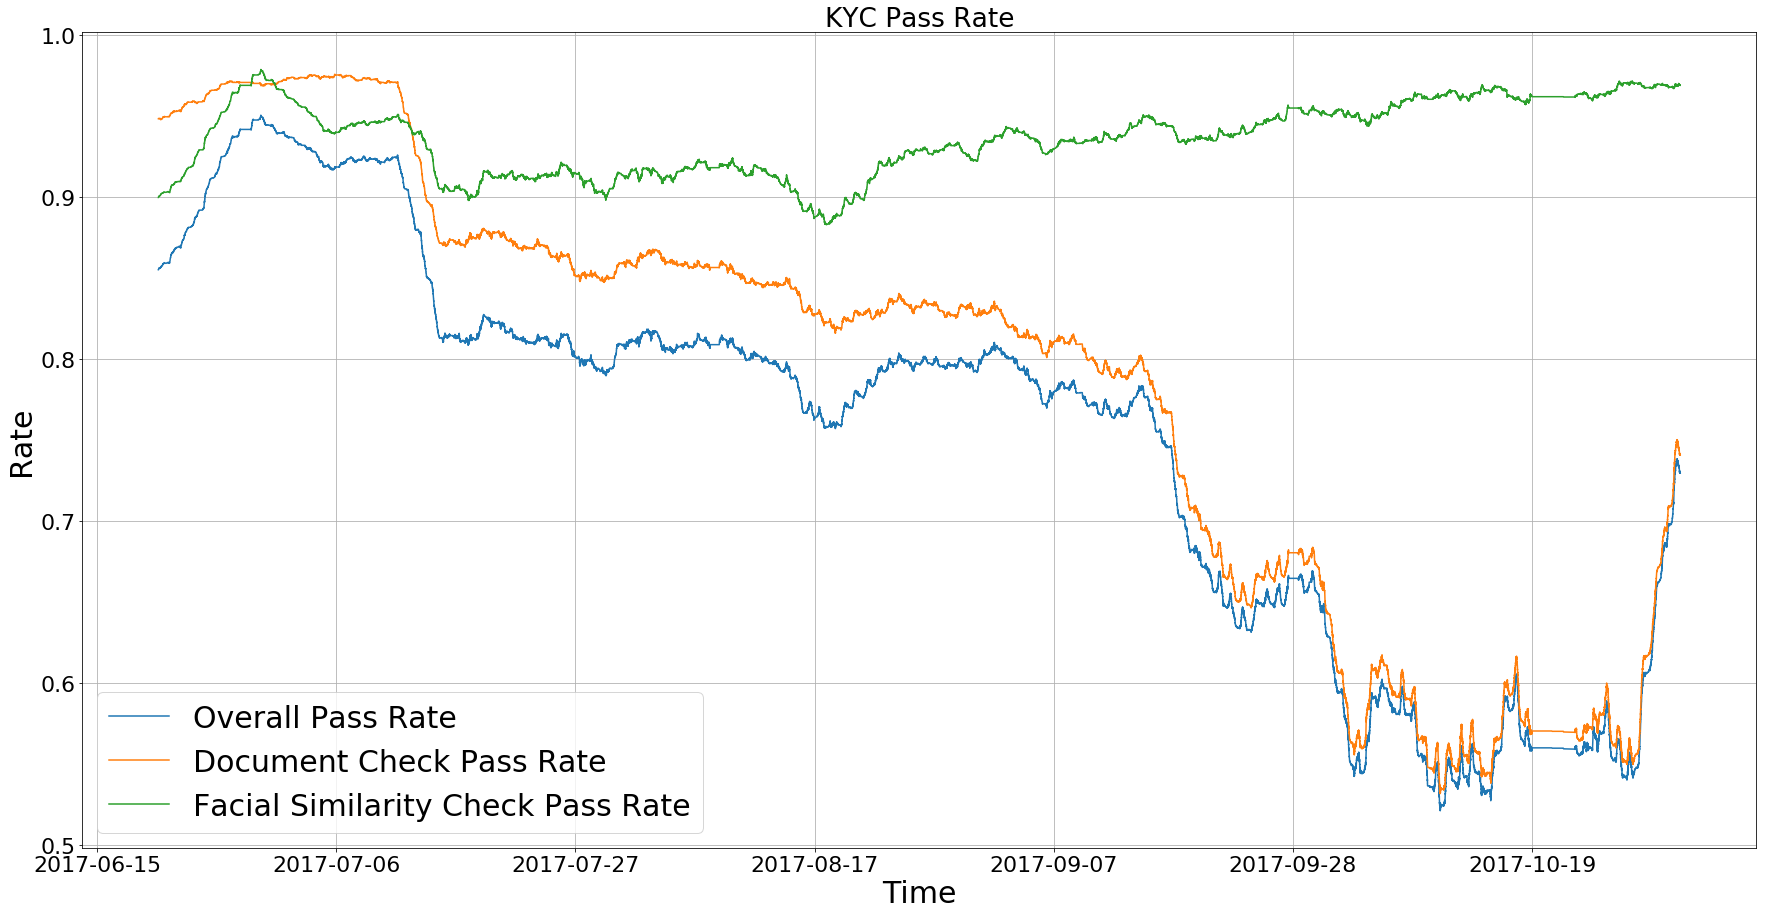

In [ ]:
#This code may not work properly with newer versions of matplotlib. Please use older versions to run it.

'''
rej = final_data['sub_result'] == 'rejected' 
caut = final_data['sub_result'] == "caution"
susp = final_data['sub_result'] == 'suspected'
doc_fail = final_data["result_docs"] != "clear"

plot_ma([doc_fail,rej,caut,susp],['Document Failure Rate','Rejected','Caution','Suspected'],'Document Failure Sub-result')
'''

'\nrej = final_data[\'sub_result\'] == \'rejected\' \ncaut = final_data[\'sub_result\'] == "caution"\nsusp = final_data[\'sub_result\'] == \'suspected\'\ndoc_fail = final_data["result_docs"] != "clear"\n\nplot_ma([doc_fail,rej,caut,susp],[\'Document Failure Rate\',\'Rejected\',\'Caution\',\'Suspected\'],\'Document Failure Sub-result\')\n'

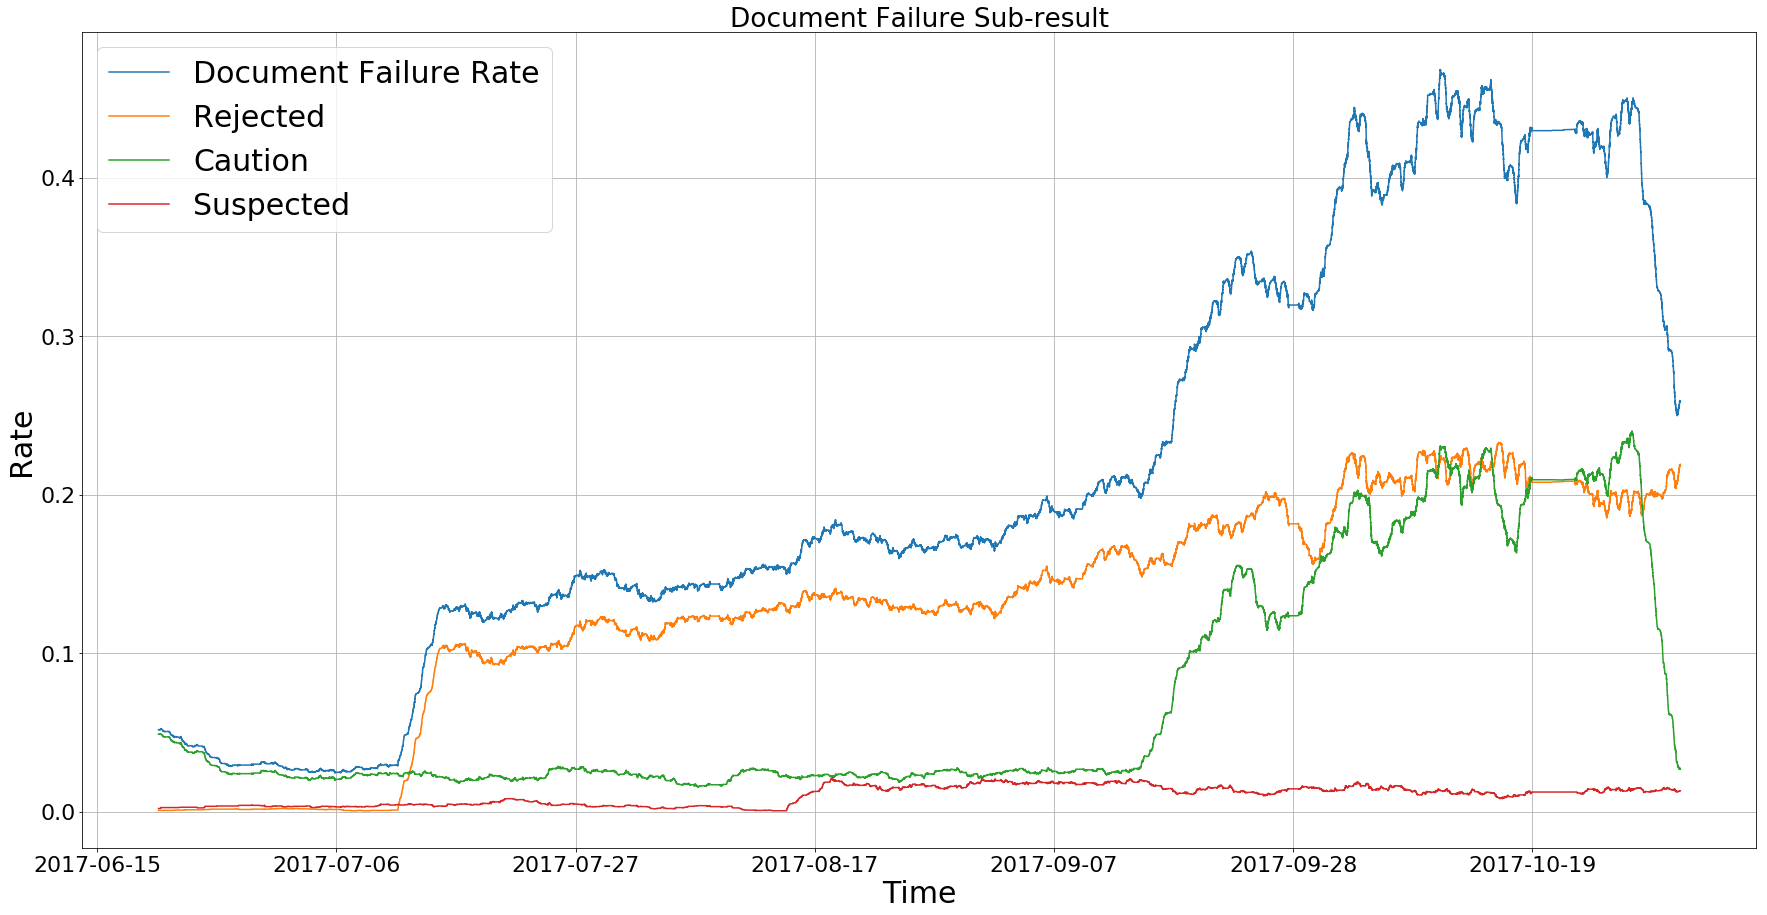

In [ ]:
#This code may not work properly with newer versions of matplotlib. Please use older versions to run it.

#plot_ma([doc_fail,rej,caut,susp],['Document Failure Rate','Rejected','Caution','Suspected'],'Document Failure Sub-result',93000)

#Zooming in


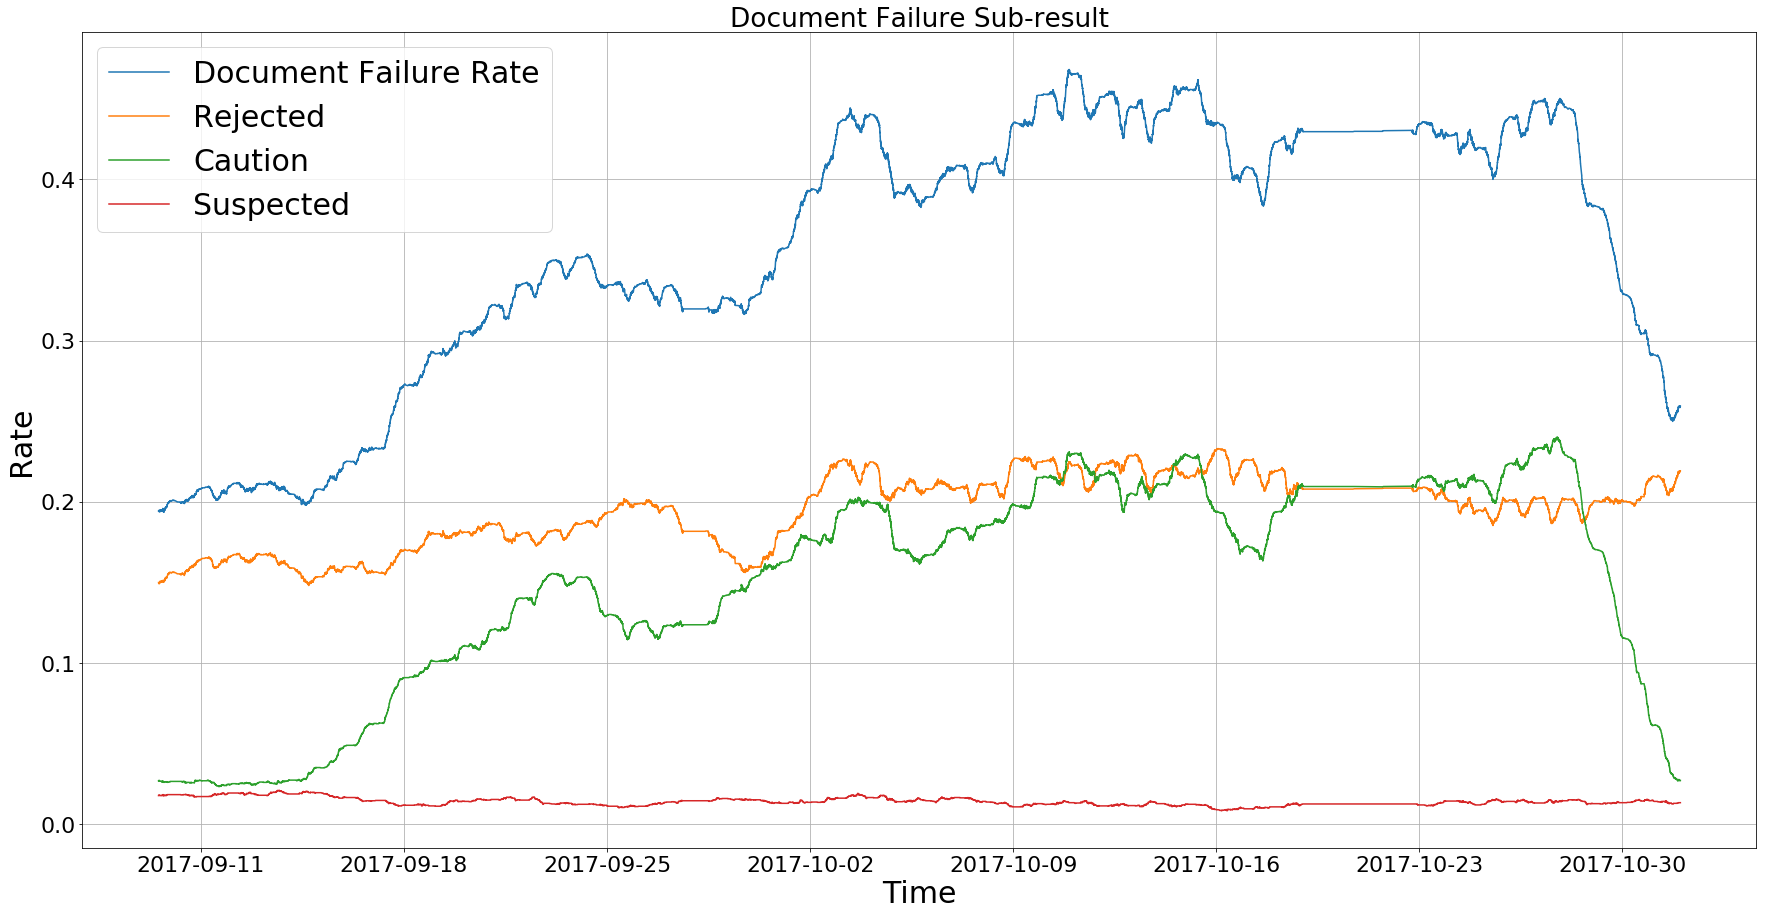

In [ ]:
#This code doesnt work properly on the newer versions of matplotlib. Please use older versions
'''
def plt_sma_bn(variables,labels,title='',start=0,N=8000):
    for result in range(len(variables)):
        variables[result] = final_data[variables[result]] == "clear"
    plt_sma(variables,labels,title,start,N)

# Visual Authenticity Result: face detection result is a component
plt_sma_bn(['result_docs','visual_authenticity_result','face_detection_result'],['Document Pass Rate','Document Visual Authenticity Result','Face Dectection Result'],'Visual Authenticity Result') 
'''

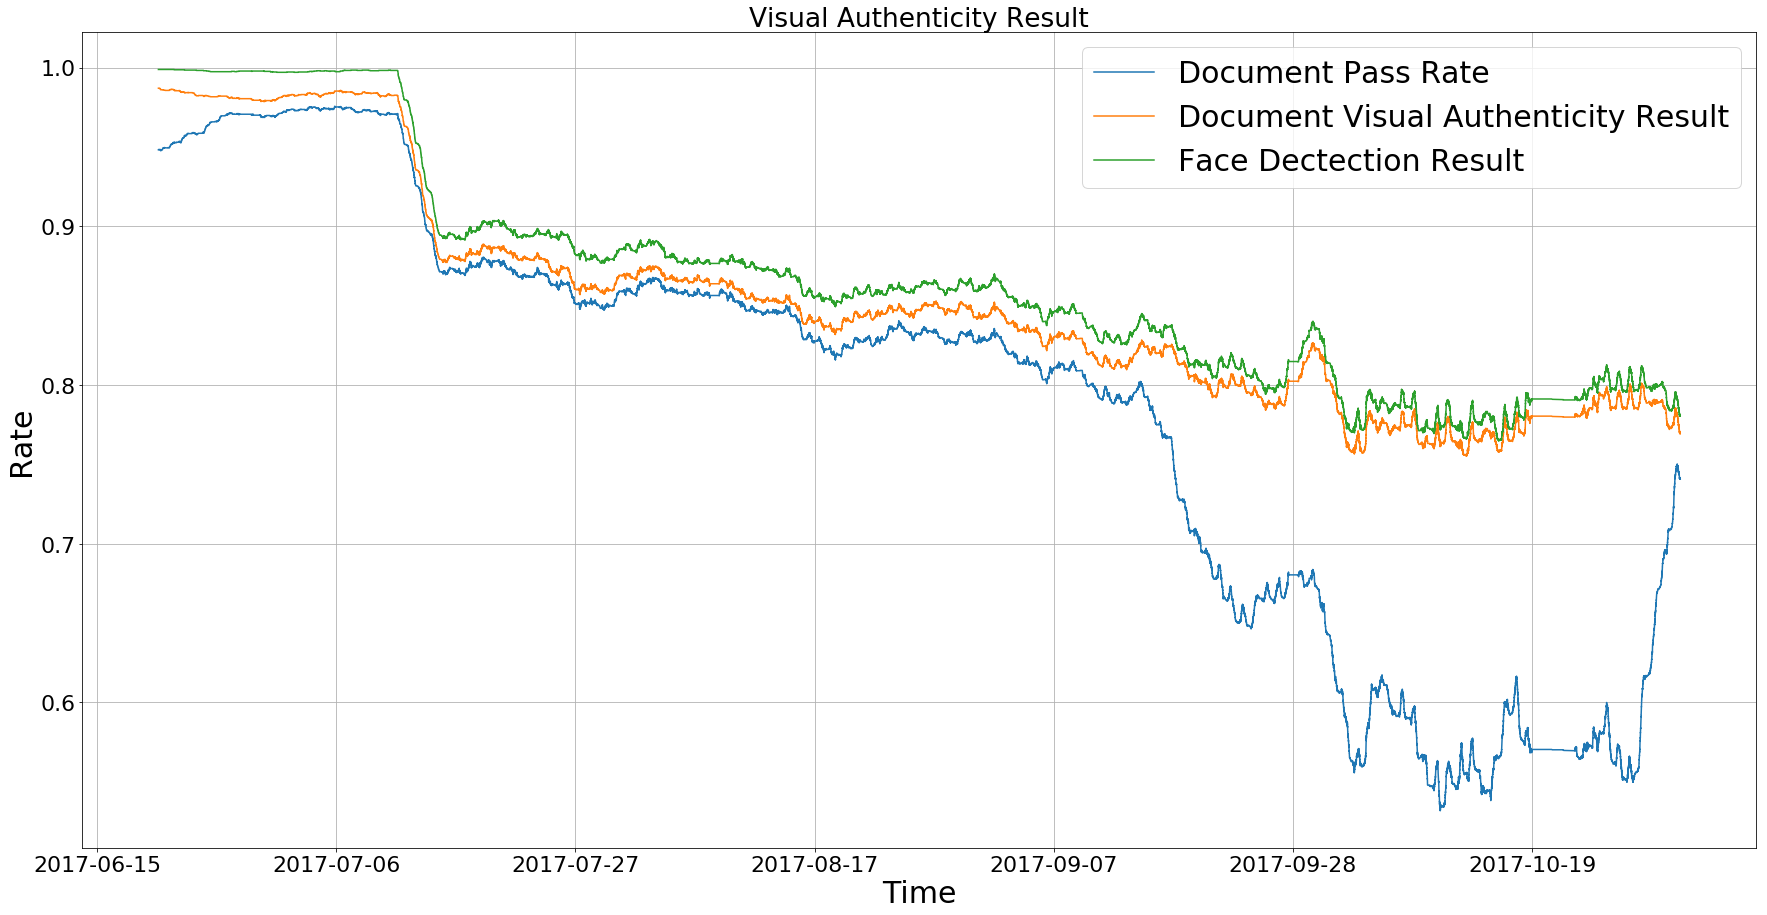

In [ ]:
#This code doesnt work properly on the newer versions of matplotlib. Please use older versions
#plt_sma_bn(['result_docs','image_integrity_result','conclusive_document_quality_result','colour_picture_result','supported_document_result','image_quality_result'],['Document Pass Rate','Image Integrity Result','Conclusive Document Quality Result','Colour Picture Result','Supported Document Result','Image Quality Result'],'Image Integrity Result')

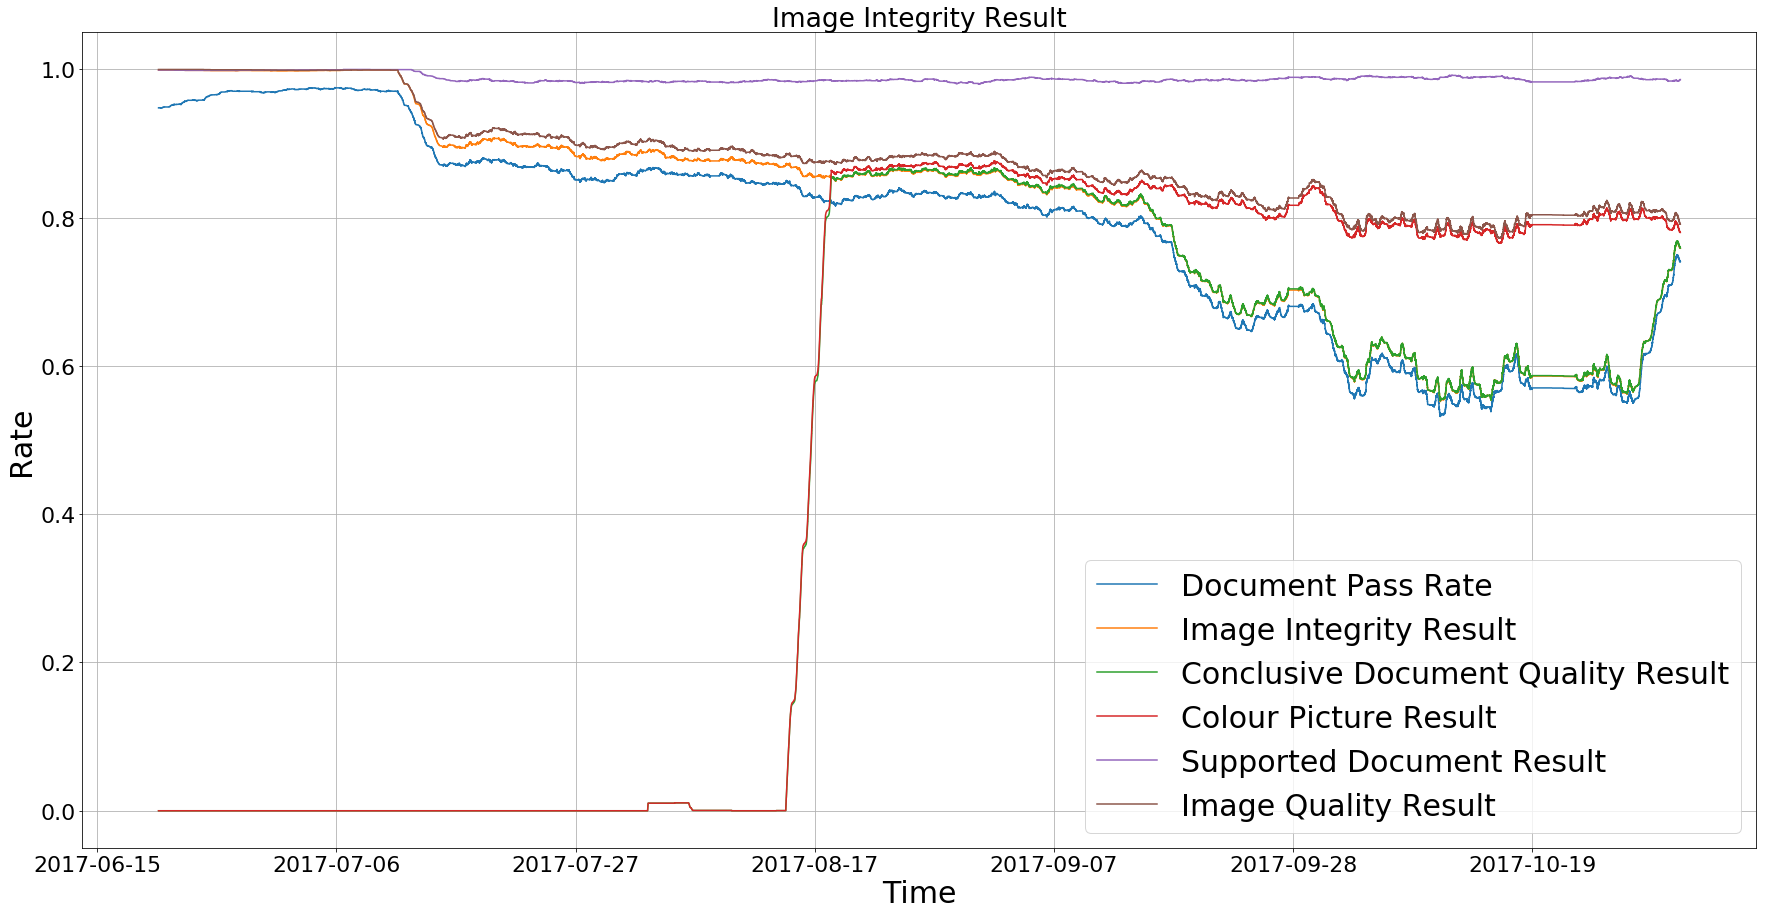

In [ ]:
#plt_sma_bn(['result_docs','image_integrity_result','conclusive_document_quality_result','colour_picture_result'],['Document Pass Rate','Image Integrity Result','Conclusive Document Quality Result','Colour Picture Result'],'Image Integrity Result',58400)

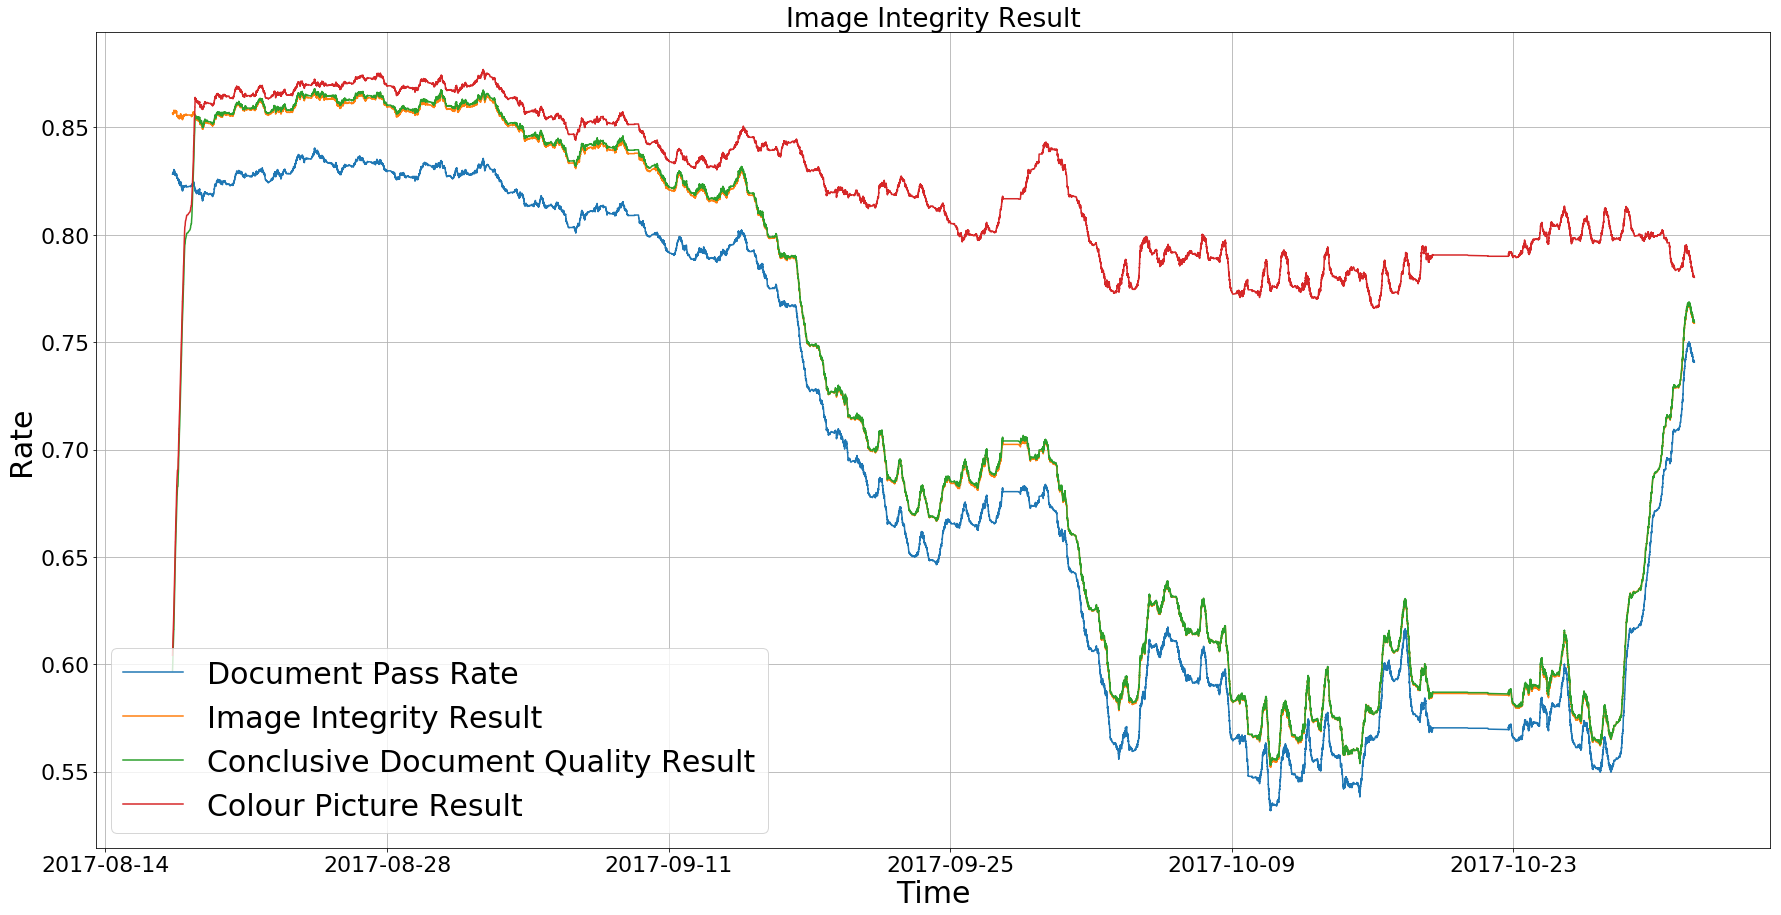

In [ ]:
#plt_sma_bn(['result_docs','police_record_result','data_validation_result','data_consistency_result','data_comparison_result','compromised_document_result'],['Document Pass Rate','Police Record Result','Data Validation Result','Data Consistency Result','Data Comparison Result','Compromised Document Result'])

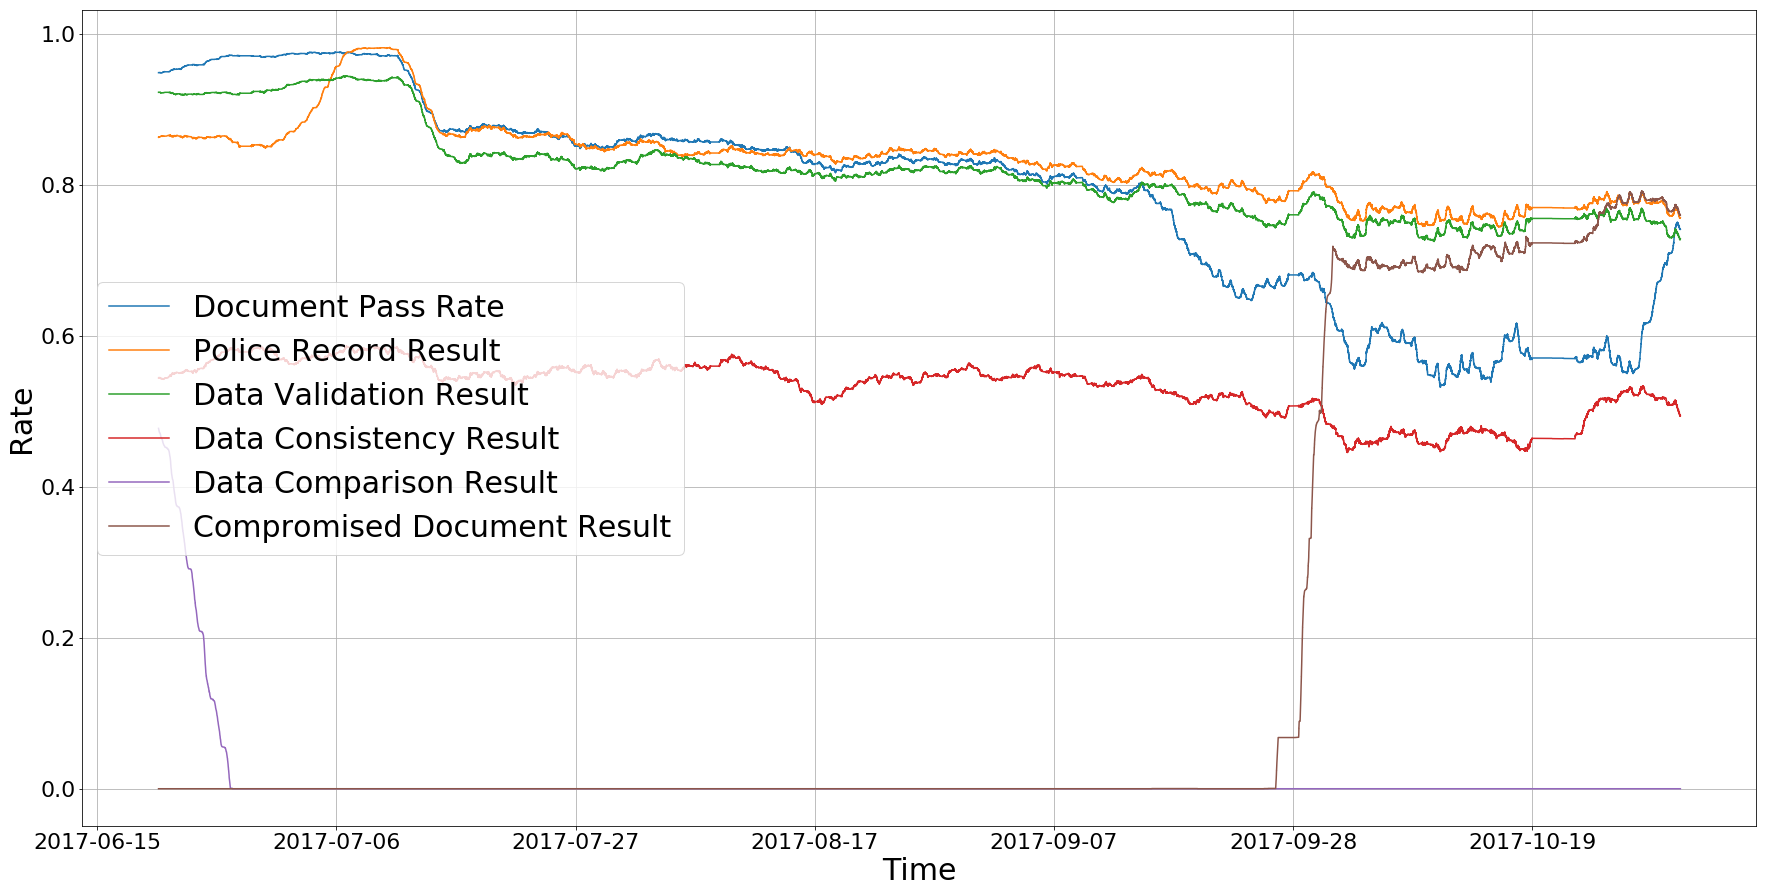

In [ ]:
import ast
#We are using ast module to convert the data structure into a dictionary
final_data['properties_docs'] = final_data['properties_docs'].apply(lambda element: ast.literal_eval(element))

In [ ]:
def fkl():
    a = []
    for i in final_data['properties_docs']:
        for j in i:
            if j not in a:
                a+=[j]
    return a
kl = fkl()
# find list of fields in properties
def separate(idx, var):
    dictionary = final_data['properties_docs'][idx]
    if var in dictionary:
            return dictionary[var]
def separate_columns_for_keys(kl):
    for i in kl:
        final_data[i]= final_data.index
        final_data[i] = final_data[i].apply(lambda index: separate(index,i))
separate_columns_for_keys(kl)

In [ ]:
'''
def plot_ma_Null(variables,labels,start=0,N=5000):
    for result in range(len(variables)):
        if result > 0:
            variables[result] = df[variables[result]].isnull()
    plot_ma(variables,labels,start,N)
W = [doc_failure,'police_record_result','conclusive_document_quality_result','image_integrity_result','visual_authenticity_result','face_detection_result','colour_picture_result','image_quality_result','data_validation_result']
plot_ma_Null(W,['Document Failure Rate','Police Record Null Rate','Conclusive Document Null Rate','Image Integrity Null Rate', 'Visual Authenticity Null Rate','Face Detection Null Rate','Colour Picture Null Rate','Image Quality Null Rate','Data Validation Null Result'],'Rate of Null Values',58400)
# Colour picture and conclusive document quality which are sub-checks Image Integrity
# had null results and then conclusive document quality produced values coinciding with the increase in the Document Failure Rate
'''

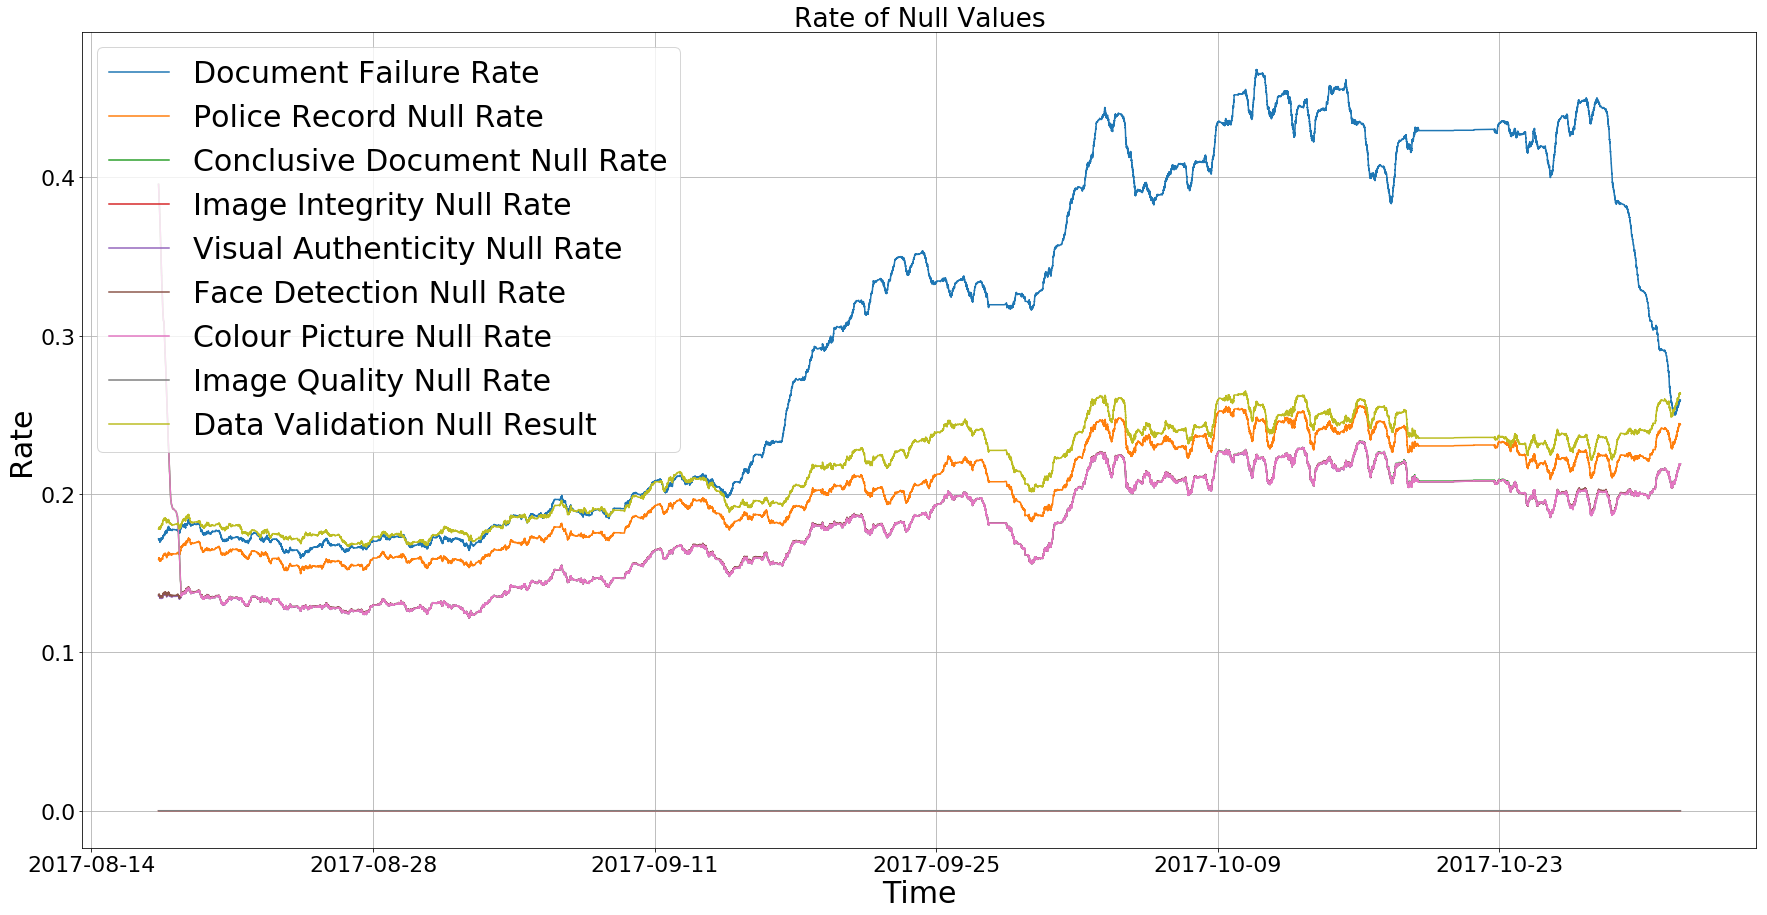

In [ ]:
plot_ma_Null([doc_failure,'date_of_expiry','issuing_country','nationality'],['Document Failure Rate','Date of Expiry Null Rate','Issuing Country Null Rate','Nationality Null Rate'],'Rate of Null Values',58400)


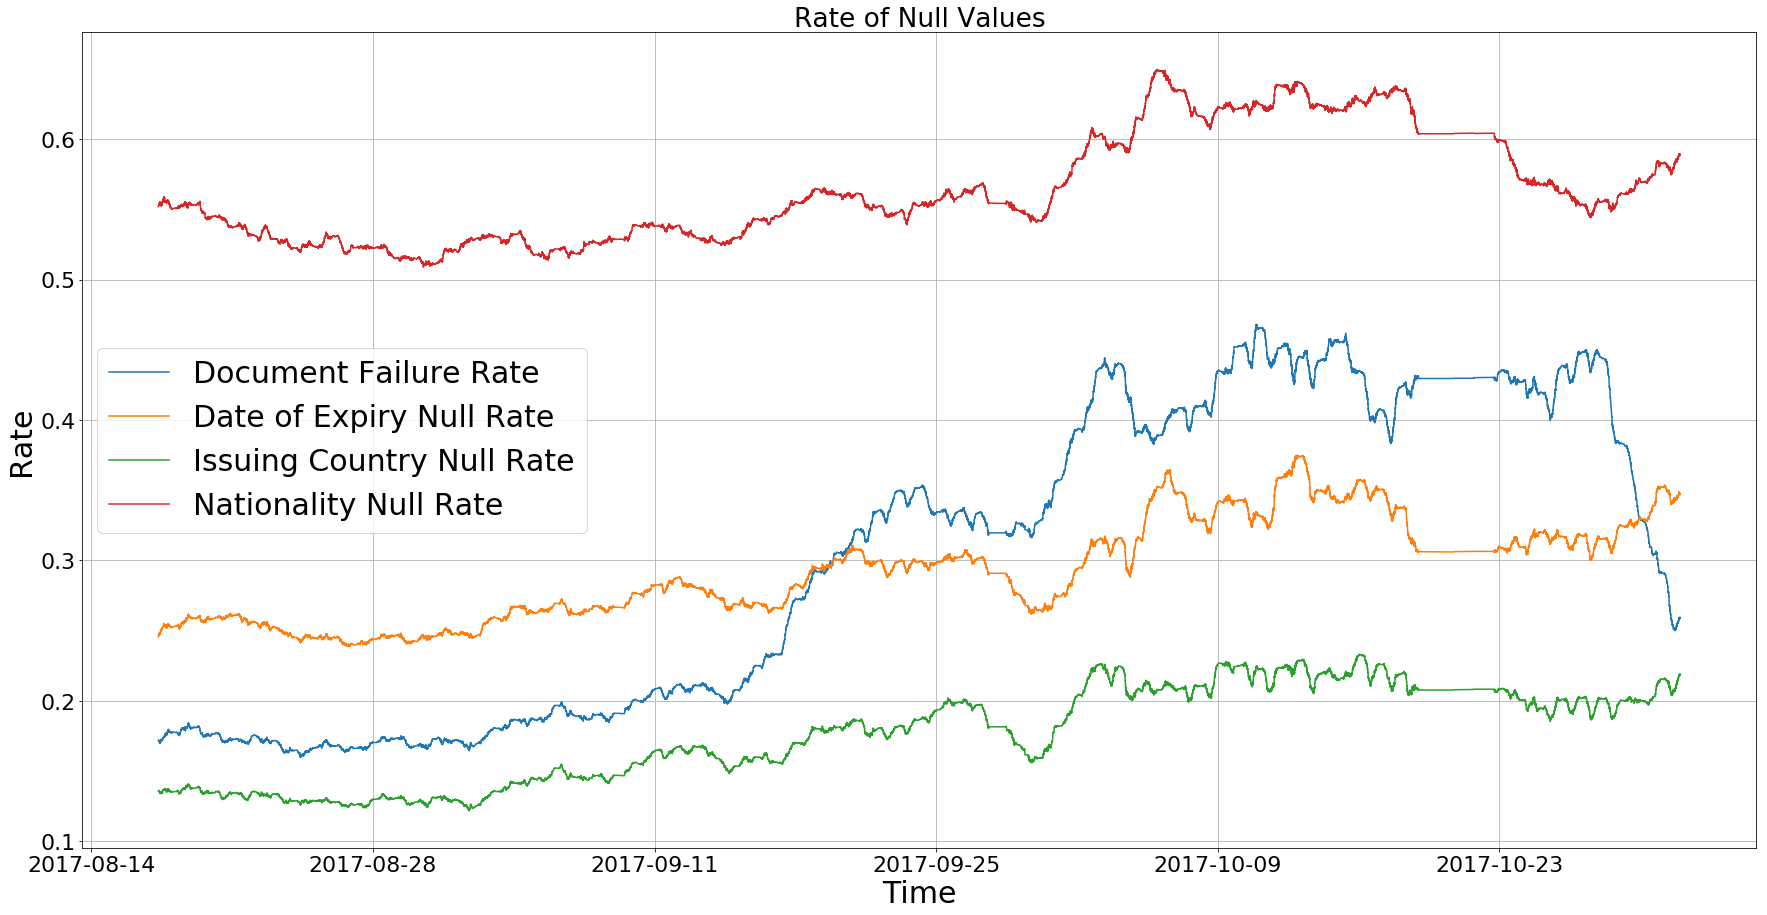

In [ ]:
#This code doesnt work properly on the newer versions of matplotlib. Please use older versions
#plt_sma_bn(['result_docs','image_integrity_result','conclusive_document_quality_result','image_quality_result'],['Document Pass Rate','Image Integrity Result','Conclusive Document Quality Result','Colour Picture Result','Supported Document Result','Image Quality Result'],'Image Integrity Result')

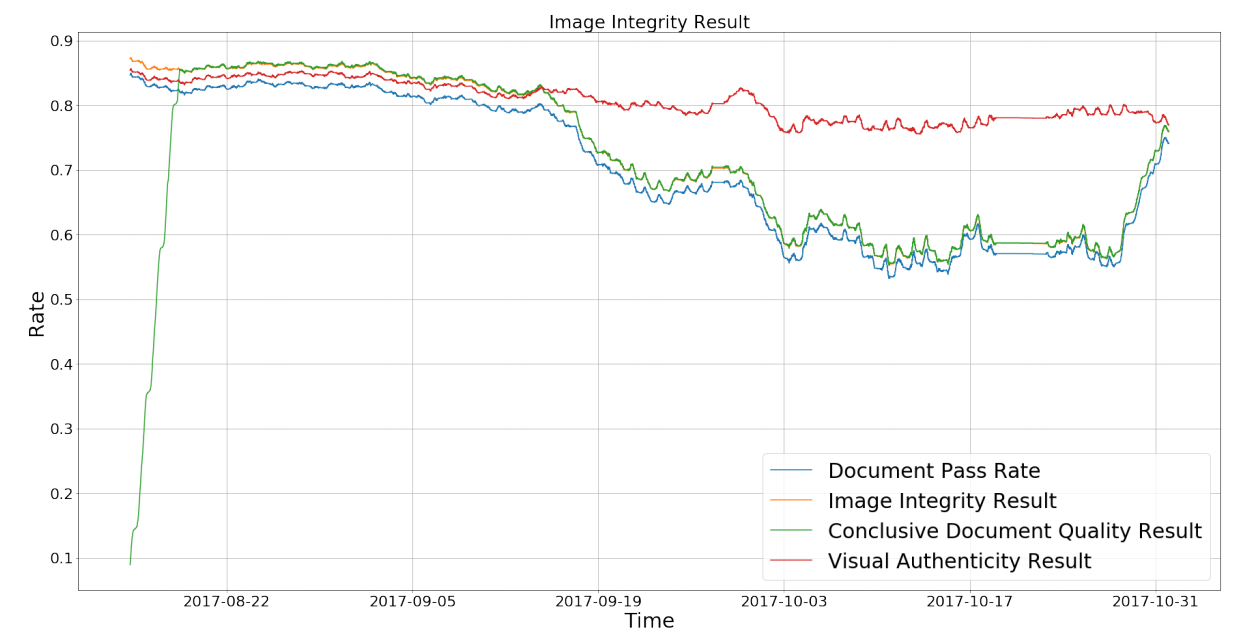